In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HARSHIT JAIN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\HARSHIT JAIN\Desktop\data science projects\Real_Estate_Data_science_Project\DATASETS\gurgaon_properties_missing_value_imputation\gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqrt,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,dlf park place,sector 54,5.75,24689.0,3,4,3,12.0,Relatively New,2329.0,0,1,0,0,0,2,174
1,falt,palam vihar society,sector 2,3.35,7444.0,4,4,3+,2.0,New Property,5000.0,1,0,0,0,0,1,66
2,falt,tulip violet,sector 69,1.40,8856.0,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,1,120
3,falt,m3m golf hills phase 1,sector 79,1.70,10828.0,3,2,3,10.0,Relatively New,1570.0,0,0,0,0,0,1,0
4,falt,godrej nature plus,sector 33,1.35,8670.0,3,2,3+,17.0,New Property,1409.0,0,0,0,0,0,1,38


In [5]:
df.shape

(3555, 18)

In [6]:
train_df = df.drop(columns=['society','price_per_sqrt'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,falt,sector 54,5.75,3,4,3,12.0,Relatively New,2329.0,0,1,0,0,0,2,174
1,falt,sector 2,3.35,4,4,3+,2.0,New Property,5000.0,1,0,0,0,0,1,66
2,falt,sector 69,1.40,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,1,120
3,falt,sector 79,1.70,3,2,3,10.0,Relatively New,1570.0,0,0,0,0,0,1,0
4,falt,sector 33,1.35,3,2,3+,17.0,New Property,1409.0,0,0,0,0,0,1,38


In [8]:
train_df.describe()

,price,bedRoom,bathroom,floorNum,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000,3555.000000
mean,2.440242,3.091983,3.266948,6.885795,1861.218599,0.187342,0.358650,0.090295,0.172433,0.107736,0.771308,72.421941
std,2.783690,1.245919,1.449940,6.061902,1216.607543,0.390241,0.479672,0.286645,0.377810,0.310090,0.531790,53.071747
min,0.070000,1.000000,1.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.950000,2.000000,2.000000,2.000000,1202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,1.510000,3.000000,3.000000,5.000000,1613.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000
75%,2.650000,4.000000,4.000000,10.000000,2200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000
max,31.500000,10.000000,12.000000,51.000000,12222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


In [9]:
train_df.corr(numeric_only= True)['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748416
bathroom           0.609837
bedRoom            0.591199
servant room       0.391710
pooja room         0.320021
store room         0.305786
study room         0.243023
luxury_score       0.091475
others            -0.013323
floorNum          -0.087403
furnishing_type   -0.111794
Name: price, dtype: float64

<Axes: >

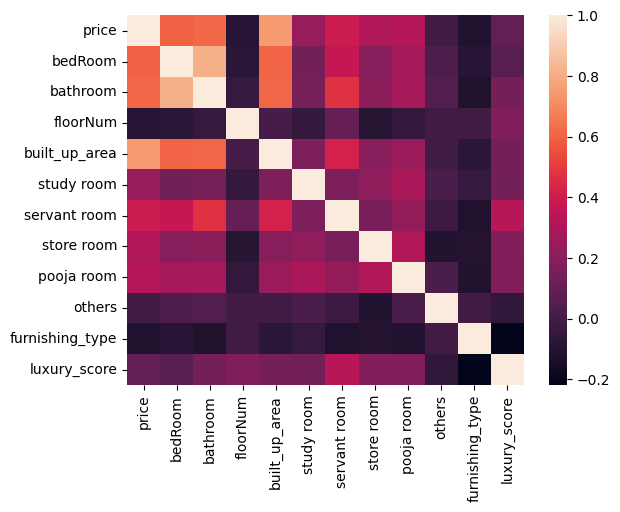

In [10]:
sns.heatmap(train_df.corr(numeric_only=True))

In [11]:
# cols in question

## numerical -> luxury_score, others, floorNum
## categorical -> property_type, sector, agePossession

In [12]:
# luxury score

<Axes: >

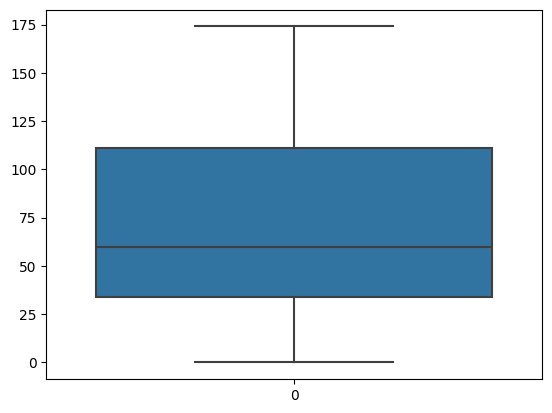

In [13]:
sns.boxplot(df['luxury_score'])

In [14]:
def categorize_luxury(score):
    if 0 <= score < 50 :
        return 'low'
    elif 50 <= score < 150:
        return 'medium'
    elif 150 <= score <=175 :
        return 'high'
    else :
        return None 
    

In [15]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,falt,sector 54,5.75,3,4,3,12.0,Relatively New,2329.0,0,1,0,0,0,2,174,high
1,falt,sector 2,3.35,4,4,3+,2.0,New Property,5000.0,1,0,0,0,0,1,66,medium
2,falt,sector 69,1.40,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,1,120,medium
3,falt,sector 79,1.70,3,2,3,10.0,Relatively New,1570.0,0,0,0,0,0,1,0,low
4,falt,sector 33,1.35,3,2,3+,17.0,New Property,1409.0,0,0,0,0,0,1,38,low


In [17]:
# floorNum

<Axes: >

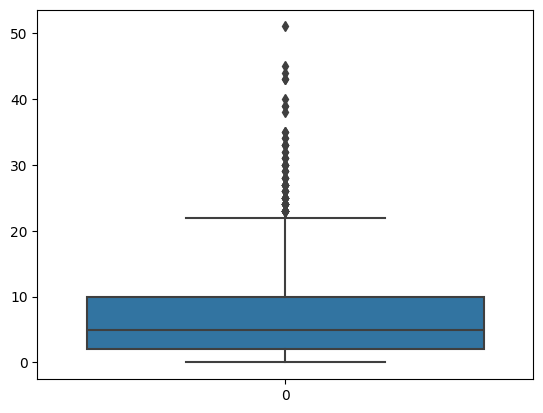

In [18]:
sns.boxplot(df['floorNum'])

In [19]:
def categorize_floor(floor):
    if 1 <= floor <= 2 :
        return 'low floor'
    elif 3 <= floor <= 10:
        return 'medium floor'
    elif 11 <= floor <=51 :
        return 'high floor'
    else :
        return None 

In [20]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,falt,sector 54,5.75,3,4,3,12.0,Relatively New,2329.0,0,1,0,0,0,2,174,high,high floor
1,falt,sector 2,3.35,4,4,3+,2.0,New Property,5000.0,1,0,0,0,0,1,66,medium,low floor
2,falt,sector 69,1.40,3,3,2,9.0,Relatively New,1428.0,0,0,0,1,0,1,120,medium,medium floor
3,falt,sector 79,1.70,3,2,3,10.0,Relatively New,1570.0,0,0,0,0,0,1,0,low,medium floor
4,falt,sector 33,1.35,3,2,3+,17.0,New Property,1409.0,0,0,0,0,0,1,38,low,high floor


In [22]:
train_df.drop(columns=['luxury_score','floorNum'],inplace=True)

In [23]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,falt,sector 54,5.75,3,4,3,Relatively New,2329.0,0,1,0,0,0,2,high,high floor
1,falt,sector 2,3.35,4,4,3+,New Property,5000.0,1,0,0,0,0,1,medium,low floor
2,falt,sector 69,1.40,3,3,2,Relatively New,1428.0,0,0,0,1,0,1,medium,medium floor
3,falt,sector 79,1.70,3,2,3,Relatively New,1570.0,0,0,0,0,0,1,low,medium floor
4,falt,sector 33,1.35,3,2,3+,New Property,1409.0,0,0,0,0,0,1,low,high floor


In [24]:
# Encoding

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['falt', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [26]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,63.0,3,4,3.0,3.0,2329.0,0,1,0,0,0,2,0.0,0.0
1,0.0,27.0,4,4,4.0,1.0,5000.0,1,0,0,0,0,1,2.0,1.0
2,0.0,80.0,3,3,2.0,3.0,1428.0,0,0,0,1,0,1,2.0,2.0
3,0.0,91.0,3,2,3.0,3.0,1570.0,0,0,0,0,0,1,1.0,2.0
4,0.0,41.0,3,2,4.0,1.0,1409.0,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,97.0,3,3,2.0,3.0,1972.0,0,0,0,0,0,0,2.0,1.0
3551,0.0,65.0,1,1,1.0,0.0,839.0,0,0,0,0,0,1,2.0,3.0
3552,1.0,69.0,4,2,2.0,0.0,1600.0,0,0,0,0,0,1,1.0,1.0
3553,0.0,103.0,3,3,2.0,1.0,1611.0,1,0,0,0,0,1,2.0,2.0


In [27]:
y_label

0       5.75
1       3.35
2       1.40
3       1.70
4       1.35
        ... 
3550    1.42
3551    0.65
3552    0.40
3553    1.28
3554    0.50
Name: price, Length: 3555, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

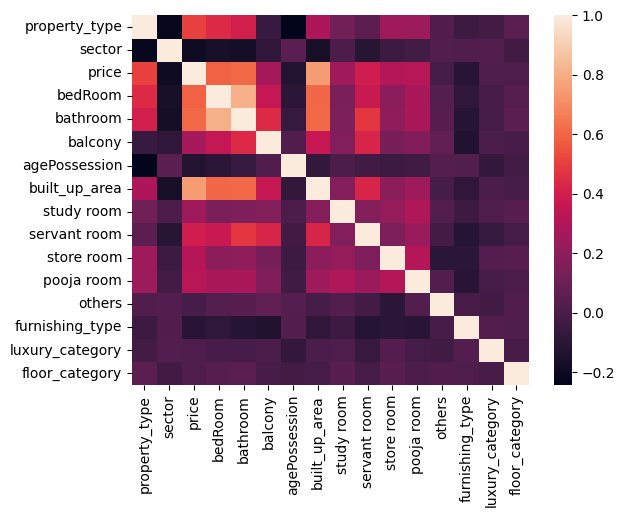

In [28]:
sns.heatmap(data_label_encoded.corr())

In [29]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})


In [30]:
fi_df1

,feature,corr_coeff
0,sector,-0.199073
1,price,1.000000
2,bedRoom,0.591199
3,bathroom,0.609837
4,balcony,0.269680
5,agePossession,-0.130675
6,built_up_area,0.748416
7,study room,0.243023
8,servant room,0.391710
9,store room,0.305786


# Technique 2 - Random Forest Feature Importance

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.651443
0,property_type,0.101534
1,sector,0.096225
2,bedRoom,0.028253
3,bathroom,0.023497
8,servant room,0.021003
5,agePossession,0.014654
4,balcony,0.012798
12,furnishing_type,0.009736
7,study room,0.008834


# Technique 3 - Gradient Boosting Feature importances

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.685803
0,property_type,0.100001
1,sector,0.096782
2,bedRoom,0.035099
3,bathroom,0.033643
8,servant room,0.024792
9,store room,0.009654
7,study room,0.004936
5,agePossession,0.004475
12,furnishing_type,0.001747


# Technique 4 - Permutation Importance

In [33]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)


perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)


fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.669604
0,property_type,0.144439
1,sector,0.127789
8,servant room,0.020811
2,bedRoom,0.018954
3,bathroom,0.011123
12,furnishing_type,0.003773
10,pooja room,0.003423
5,agePossession,0.003305
4,balcony,0.002955


# Technique 5 - LASSO

In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)


lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)


fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.508473
0,property_type,0.704248
3,bathroom,0.294384
9,store room,0.206736
7,study room,0.180114
8,servant room,0.179056
10,pooja room,0.086280
13,luxury_category,0.041785
2,bedRoom,0.017745
14,floor_category,-0.000000


# Technique 6 - RFE

In [35]:
from sklearn.feature_selection import RFE


estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)


selected_features = X_label.columns[selector_label.support_]


selected_coefficients = selector_label.estimator_.feature_importances_


fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.650499
1,sector,0.102870
0,property_type,0.100597
2,bedRoom,0.024377
3,bathroom,0.023836
8,servant room,0.020933
5,agePossession,0.013905
4,balcony,0.012610
12,furnishing_type,0.010317
7,study room,0.008454


# Technique 7 - Linear Regression Weights

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)


fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.511429
0,property_type,0.700552
3,bathroom,0.301559
9,store room,0.211040
7,study room,0.188741
8,servant room,0.188580
10,pooja room,0.090070
13,luxury_category,0.051945
2,bedRoom,0.020980
14,floor_category,-0.004417


# Technique 8 - SHAP

In [37]:
!pip install shap

In [38]:
import shap


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)


shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.33479517,  1.07048963, -0.03287123, ...,  0.43666262,
         0.04730074,  0.2361053 ],
       [-0.88319134, -0.27724891, -0.05948181, ..., -0.04405848,
        -0.01018645, -0.01613899],
       [-0.20167584,  0.01190882, -0.01406513, ..., -0.00536251,
        -0.01341233,  0.00137291],
       ...,
       [ 0.32235891, -0.00570187, -0.03276791, ..., -0.01859629,
        -0.00576753, -0.00810797],
       [-0.20672983, -0.46344529,  0.00955364, ..., -0.00982497,
        -0.00777998, -0.00745213],
       [-0.18285118, -0.25127435, -0.0570132 , ..., -0.00800119,
        -0.00174127, -0.0041285 ]])

In [39]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.249078
0,property_type,0.474375
1,sector,0.371047
3,bathroom,0.107312
8,servant room,0.095240
2,bedRoom,0.061340
4,balcony,0.039319
14,floor_category,0.025864
5,agePossession,0.025162
12,furnishing_type,0.023885


In [40]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [41]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.199073,0.096225,0.096782,0.127789,-0.046171,0.102870,-0.054908,0.371047
bedRoom,0.591199,0.028253,0.035099,0.018954,0.017745,0.024377,0.020980,0.061340
bathroom,0.609837,0.023497,0.033643,0.011123,0.294384,0.023836,0.301559,0.107312
balcony,0.269680,0.012798,0.001674,0.002955,-0.035877,0.012610,-0.059521,0.039319
agePossession,-0.130675,0.014654,0.004475,0.003305,-0.026317,0.013905,-0.033824,0.025162
built_up_area,0.748416,0.651443,0.685803,0.669604,1.508473,0.650499,1.511429,1.249078
study room,0.243023,0.008834,0.004936,-0.000813,0.180114,0.008454,0.188741,0.020442
servant room,0.391710,0.021003,0.024792,0.020811,0.179056,0.020933,0.188580,0.095240
store room,0.305786,0.008783,0.009654,0.002330,0.206736,0.007994,0.211040,0.020501


In [42]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [43]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.717694
sector             0.131207
bathroom           0.030939
bedRoom            0.029819
servant room       0.028850
agePossession      0.010542
balcony            0.010504
store room         0.008396
furnishing_type    0.008029
study room         0.006728
floor_category     0.006285
pooja room         0.004641
luxury_category    0.004459
others             0.001907
dtype: float64

In [44]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,63.0,3,4,3.0,3.0,2329.0,0,1,0,0,0,2,0.0,0.0
1,0.0,27.0,4,4,4.0,1.0,5000.0,1,0,0,0,0,1,2.0,1.0
2,0.0,80.0,3,3,2.0,3.0,1428.0,0,0,0,1,0,1,2.0,2.0
3,0.0,91.0,3,2,3.0,3.0,1570.0,0,0,0,0,0,1,1.0,2.0
4,0.0,41.0,3,2,4.0,1.0,1409.0,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.0,97.0,3,3,2.0,3.0,1972.0,0,0,0,0,0,0,2.0,1.0
3551,0.0,65.0,1,1,1.0,0.0,839.0,0,0,0,0,0,1,2.0,3.0
3552,1.0,69.0,4,2,2.0,0.0,1600.0,0,0,0,0,0,1,1.0,1.0
3553,0.0,103.0,3,3,2.0,1.0,1611.0,1,0,0,0,0,1,2.0,2.0


In [45]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [46]:
scores.mean()

0.7953371817341874

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [48]:
scores.mean()

0.7928493023567331

In [49]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [50]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)